In [3]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

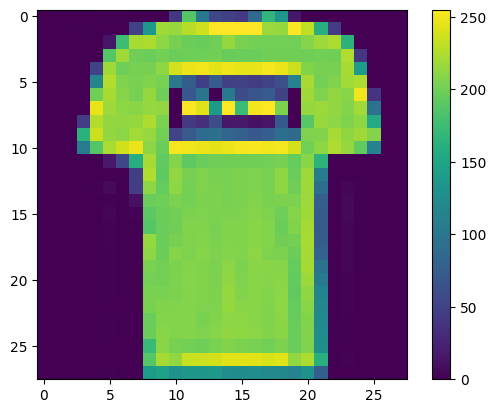

In [8]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

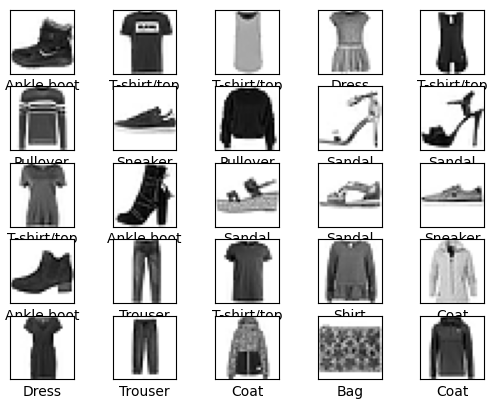

In [10]:
plt.Figure(figsize = (30,20))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3388 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3180 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2990 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2852 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2719 - accuracy: 0.8992
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2632 - accuracy: 0.9013
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2498 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2

In [14]:
test_loss,test_acc = model.evaluate(test_images,
                                    test_labels, verbose=2)
print('\nTest accuracy:', test_acc*100)

313/313 - 0s - loss: 0.3289 - accuracy: 0.8867 - 325ms/epoch - 1ms/step

Test accuracy: 88.66999745368958


In [15]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [16]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 850us/step


In [17]:
predictions[0]

array([6.5469923e-09, 2.0995310e-11, 1.5268162e-11, 2.6701412e-11,
       1.4609067e-09, 2.9830637e-03, 2.1628736e-08, 3.0922115e-02,
       1.6296627e-09, 9.6609479e-01], dtype=float32)

In [18]:
import numpy as np
np.argmax(predictions[0])

9

In [19]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
    
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

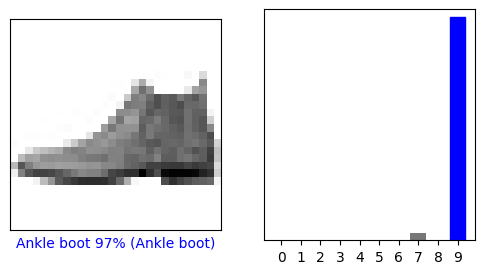

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

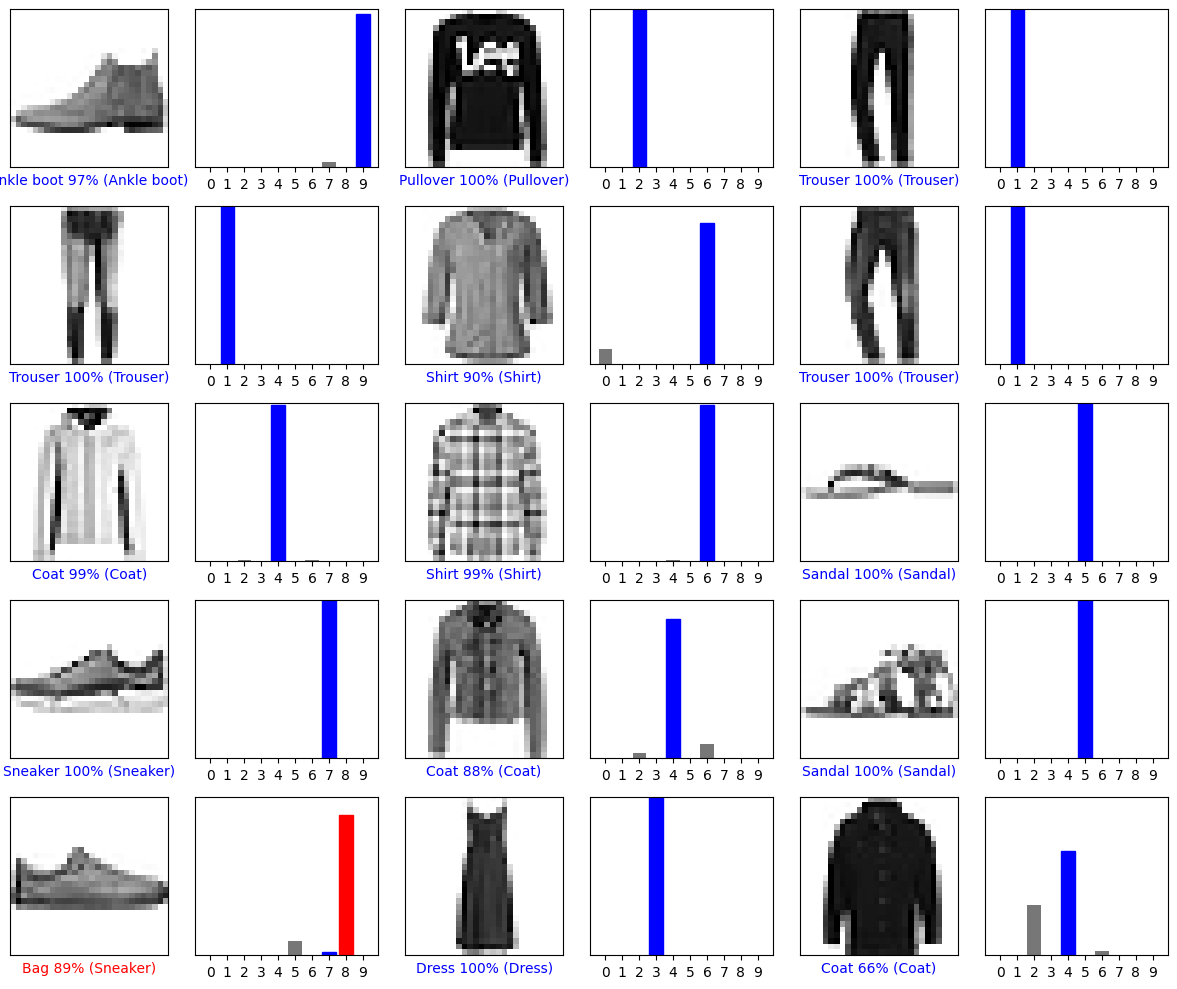

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [23]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.6705364e-06 8.1295750e-16 9.9934846e-01 1.4660393e-09 1.2918316e-04
  2.9020114e-14 5.2068685e-04 4.7908814e-14 2.2397213e-11 1.3405246e-15]]


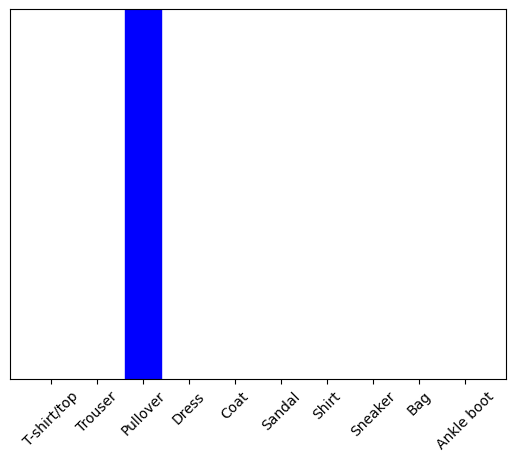

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [26]:
np.argmax(predictions_single[0])

2

In [30]:
import tensorflow as tf

# Assuming your model is called "model"
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Save the model
probability_model.save("fashion_model.h5")


d:\python\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
